# ASSIGNMENT 4 - Mohammed Raza Asfak Chidimar (MCS231004)
**Topic: Chapter 7, Chapter 8 & Chapter 9**
- Due: 21st January 2024
- Mode: Individual Assignment 
- Submission: E-Learning

### Question 1

(a)	Load `Sales Data.csv`, assign it into variable named `sales`. Display the first 10 rows of the `sales`.

In [7]:
import pandas as pd
sales = pd.read_csv('Sales Data.csv')
sales.head(10)

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,20760,295500
7,8,3700,1400,5860,9960,2860,1400,25180,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


(b)	Get total profit of all months and show line plot with the following style properties:

        ●	Line Style dotted 
        ●	Line color should be red
        ●	Line width should be 3
        ●	Add a circle marker with size 8 and blue color
        ●	Show legend at the lower right location.
        ●	X label name = Month Number
        ●	Y label name = Sold Unit number
        ●	Title = Company Sales Per Month

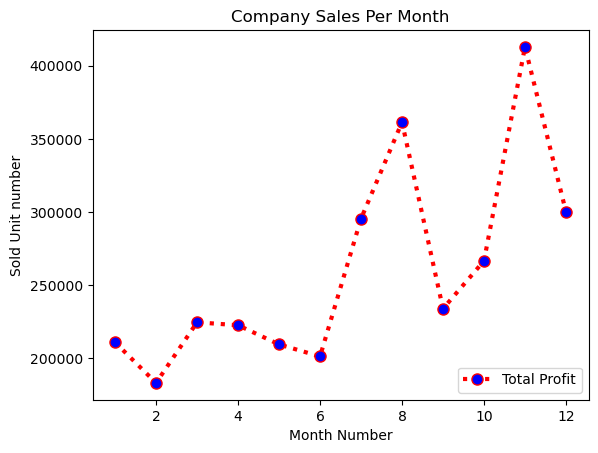

In [9]:
import matplotlib.pyplot as plt

total_profit = sales.groupby('month_number')['total_profit'].sum()
plt.plot(total_profit.index, total_profit.values, linestyle='dotted', color='red', linewidth=3, marker='o', markersize=8, markerfacecolor='blue')
plt.legend(['Total Profit'], loc='lower right')
plt.xlabel('Month Number')
plt.ylabel('Sold Unit number')
plt.title('Company Sales Per Month')
plt.show()

(c)	Read data from `Sales Data.csv` and show all product sales using a multiline plot, sized 1200 × 600 pixels. Differentiate all the lines by line color and marker.

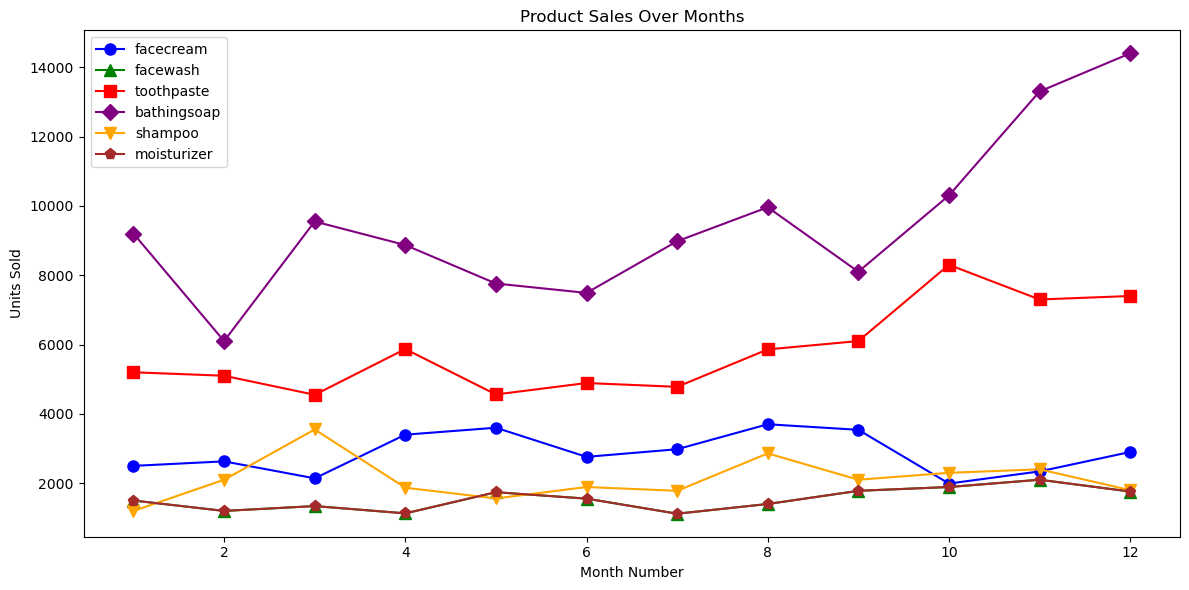

In [7]:
products = sales[['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']]
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
markers = ['o', '^', 's', 'D', 'v', 'p']
for i, product in enumerate(products.columns):
    plt.plot(sales['month_number'], products[product], label=product, color=colors[i], marker=markers[i], linestyle='-', markersize=8)
plt.xlabel('Month Number')
plt.ylabel('Units Sold')
plt.title('Product Sales Over Months')
plt.legend()
plt.tight_layout()
plt.show()

(d)	The products in the sales data can be further grouped as follow:

    a.Category A: facecream, facewash, moisturizer
    b.Category B: toothpaste
    c.Category C: bathingsoap, shampoo
    
    
Group the data accordingly and obtain the following information, then plot into two subplots: 

    1.total unit sold of each category for every month
    2.percentage of total unit sold of each category for every month over the grand total of unit sold of that category.


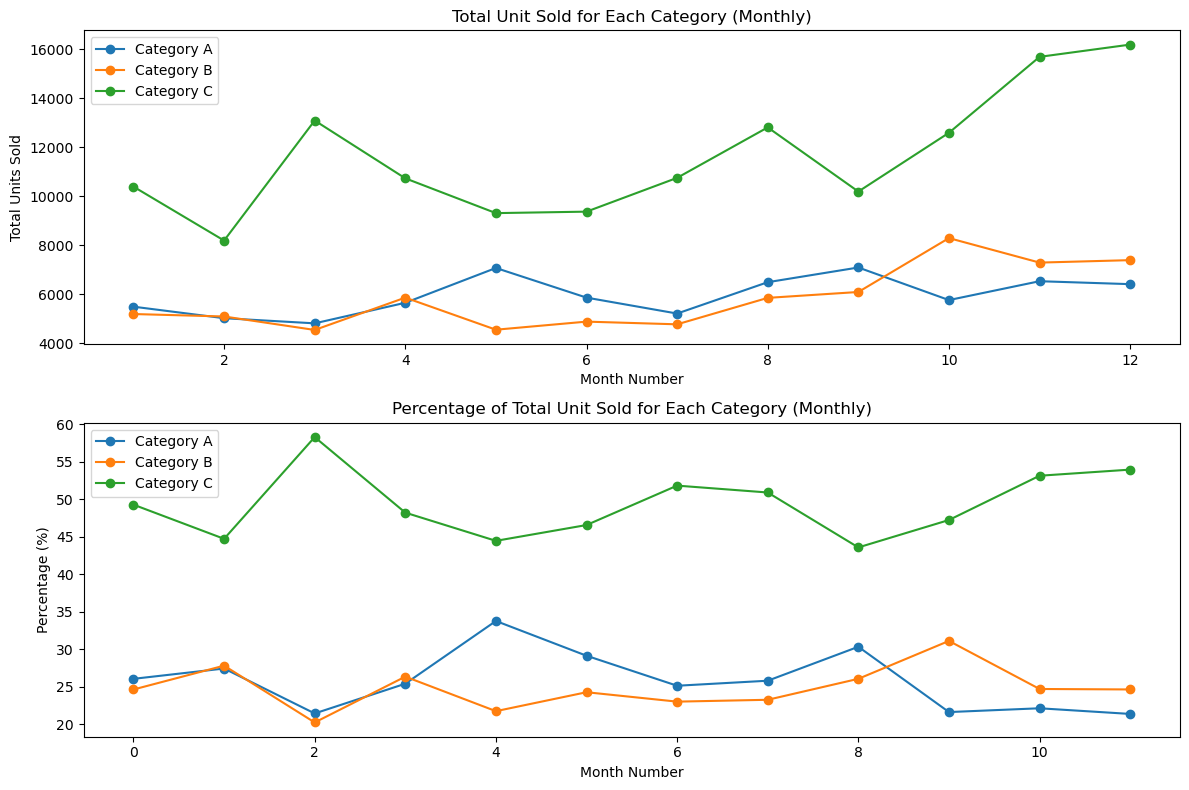

In [8]:
category_a = ['facecream', 'facewash', 'moisturizer']
category_b = ['toothpaste']
category_c = ['bathingsoap', 'shampoo']

sales['Category A'] = sales[category_a].sum(axis=1)
sales['Category B'] = sales[category_b].sum(axis=1)
sales['Category C'] = sales[category_c].sum(axis=1)

# Calculating total unit sold for each category for every month
total_units_category_a = sales.groupby('month_number')['Category A'].sum()
total_units_category_b = sales.groupby('month_number')['Category B'].sum()
total_units_category_c = sales.groupby('month_number')['Category C'].sum()

# Ploting total unit sold for each category for every month
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(total_units_category_a, label='Category A', marker='o')
plt.plot(total_units_category_b, label='Category B', marker='o')
plt.plot(total_units_category_c, label='Category C', marker='o')
plt.title('Total Unit Sold for Each Category (Monthly)')
plt.xlabel('Month Number')
plt.ylabel('Total Units Sold')
plt.legend()

# Calculating percentage of total unit sold of each category for every month
total_units_grand_total = sales[['Category A', 'Category B', 'Category C']].sum(axis=1)
percentage_category_a = (sales['Category A'] / total_units_grand_total) * 100
percentage_category_b = (sales['Category B'] / total_units_grand_total) * 100
percentage_category_c = (sales['Category C'] / total_units_grand_total) * 100

# Ploting percentage of total unit sold for each category for every month
plt.subplot(2, 1, 2)
plt.plot(percentage_category_a, label='Category A', marker='o')
plt.plot(percentage_category_b, label='Category B', marker='o')
plt.plot(percentage_category_c, label='Category C', marker='o')
plt.title('Percentage of Total Unit Sold for Each Category (Monthly)')
plt.xlabel('Month Number')
plt.ylabel('Percentage (%)')
plt.legend()
plt.tight_layout()
plt.show()

### Question 2

(a) Read the three datasets given below and save the data into different DataFrame.

    a.customer.csv
    b.products.csv
    c.sales.csv


In [17]:
customer_df = pd.read_csv('customer.csv')
products_df = pd.read_csv('products.csv')
sales_df = pd.read_csv('sales.csv')
print(customer_df)
print(products_df)
print(sales_df)

   c_id Customer
0     1     Rabi
1     2     Raju
2     3     Alex
3     4     Rani
4     5     King
5     7     Ronn
6     8      Jem
7     9      Tom
   p_id       product  price
0     1     Hard Disk     80
1     2           RAM     90
2     3       Monitor     75
3     4           CPU     55
4     5      Keyboard     20
5     6         Mouse     10
6     7   Motherboard     50
7     8  Power supply     20
   sale_id  c_id  p_id  product  qty store
0        1     2     3  Monitor    2   ABC
1        2     2     4      CPU    1   DEF
2        3     1     3  Monitor    3   ABC
3        4     4     2      RAM    2   DEF
4        5     2     3  Monitor    3   ABC
5        6     3     3  Monitor    2   DEF
6        7     2     2      RAM    3   ABC
7        8     3     2      RAM    2   DEF
8        9     2     3  Monitor    2   ABC


In [29]:
df = pd.merge(sales_df, customer_df, on='c_id', how='left')
df = pd.merge(df, products_df[['p_id', 'product', 'price']], on='p_id', how='left')
print(df)

   sale_id  c_id  p_id product_x  qty store Customer product_y  price
0        1     2     3   Monitor    2   ABC     Raju   Monitor     75
1        2     2     4       CPU    1   DEF     Raju       CPU     55
2        3     1     3   Monitor    3   ABC     Rabi   Monitor     75
3        4     4     2       RAM    2   DEF     Rani       RAM     90
4        5     2     3   Monitor    3   ABC     Raju   Monitor     75
5        6     3     3   Monitor    2   DEF     Alex   Monitor     75
6        7     2     2       RAM    3   ABC     Raju       RAM     90
7        8     3     2       RAM    2   DEF     Alex       RAM     90
8        9     2     3   Monitor    2   ABC     Raju   Monitor     75


In [30]:
df.drop(['product_y'], axis=1, inplace=True)
print(df)

   sale_id  c_id  p_id product_x  qty store Customer  price
0        1     2     3   Monitor    2   ABC     Raju     75
1        2     2     4       CPU    1   DEF     Raju     55
2        3     1     3   Monitor    3   ABC     Rabi     75
3        4     4     2       RAM    2   DEF     Rani     90
4        5     2     3   Monitor    3   ABC     Raju     75
5        6     3     3   Monitor    2   DEF     Alex     75
6        7     2     2       RAM    3   ABC     Raju     90
7        8     3     2       RAM    2   DEF     Alex     90
8        9     2     3   Monitor    2   ABC     Raju     75


In [31]:
df.rename(columns={'product_x': 'product'}, inplace=True)

(b) From the above datasets, produce a chart (any appropriate chart) for each below:

    a.products sold by each store
    b.quantity sold against each product
    c.quantity and total sales against each product


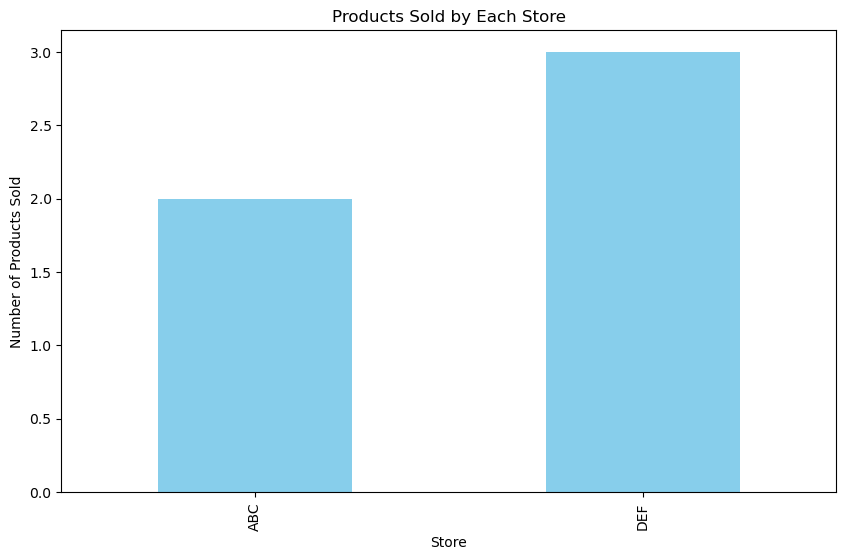

In [24]:
#a
products_by_store = df.groupby('store')['product'].nunique()
plt.figure(figsize=(10, 6))
products_by_store.plot(kind='bar', color='skyblue')
plt.title('Products Sold by Each Store')
plt.xlabel('Store')
plt.ylabel('Number of Products Sold')
plt.show()

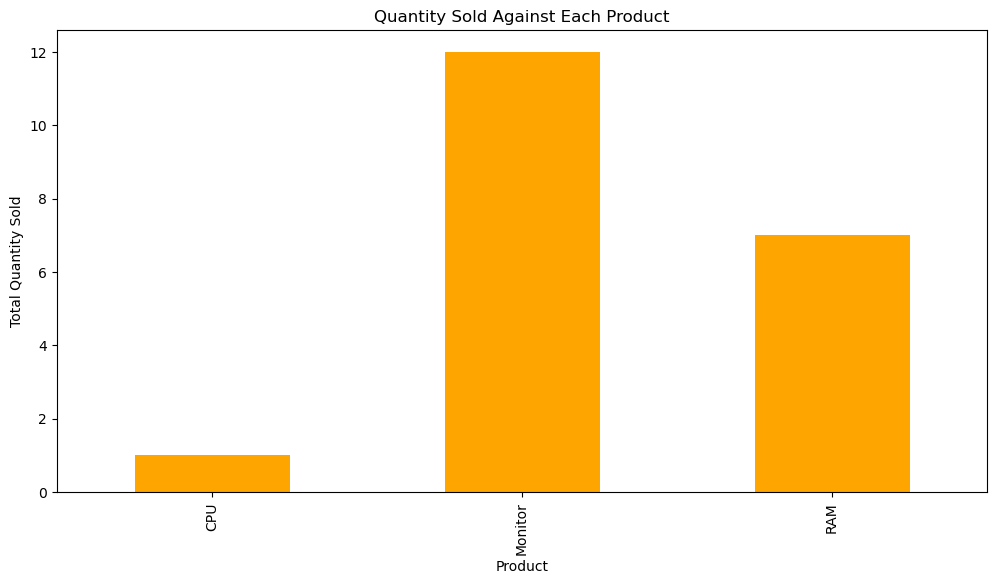

In [25]:
#b
quantity_sold_per_product = df.groupby('product')['qty'].sum()
plt.figure(figsize=(12, 6))
quantity_sold_per_product.plot(kind='bar', color='orange')
plt.title('Quantity Sold Against Each Product')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.show()

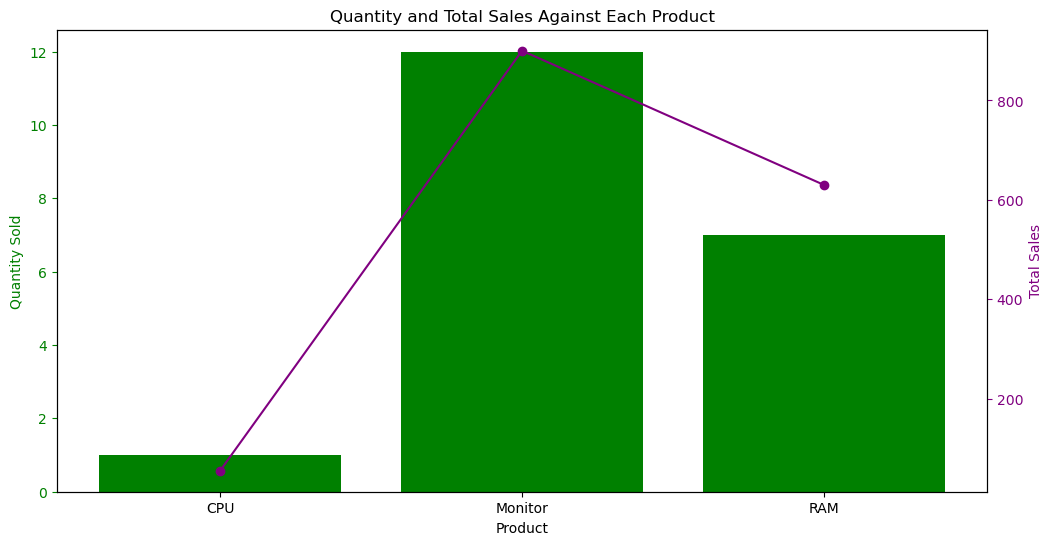

In [32]:
#c
df['total_sales'] = df['qty'] * df['price']
quantity_and_sales_per_product = df.groupby('product').agg({'qty': 'sum', 'total_sales': 'sum'})
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(quantity_and_sales_per_product.index, quantity_and_sales_per_product['qty'], color='green', label='Quantity Sold')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Sold', color='green')
ax1.tick_params('y', colors='green')

ax2 = ax1.twinx()
ax2.plot(quantity_and_sales_per_product.index, quantity_and_sales_per_product['total_sales'], color='purple', marker='o', label='Total Sales')
ax2.set_ylabel('Total Sales', color='purple')
ax2.tick_params('y', colors='purple')

plt.title('Quantity and Total Sales Against Each Product')
plt.show()

(c) From the above datasets, produce an output for each below:

    a.quantity sold against each product against each store
    b.quantity sold against each store with total turnover of the store
    c.products which are not sold
    d.customers who have not purchased any product


In [34]:
#a
quantity_sold_per_product_store = df.groupby(['product', 'store'])['qty'].sum().reset_index()
print(f"Quantity Sold Against Each Product Against Each Store : \n{quantity_sold_per_product_store}")

Quantity Sold Against Each Product Against Each Store : 
   product store  qty
0      CPU   DEF    1
1  Monitor   ABC   10
2  Monitor   DEF    2
3      RAM   ABC    3
4      RAM   DEF    4


In [35]:
#b
quantity_and_sales_per_store = df.groupby('store').agg({'qty': 'sum', 'total_sales': 'sum'}).reset_index()
print(f"\nQuantity Sold Against Each Store with Total Turnover:\n {quantity_and_sales_per_store}")


Quantity Sold Against Each Store with Total Turnover:
   store  qty  total_sales
0   ABC   13         1020
1   DEF    7          565


In [41]:
#c
all_products = products_df['product'].unique()
sold_products = df[df['qty'] > 0]['product'].unique()
unsold_products = set(all_products) - set(sold_products)
print(f"\nProducts Which Are Not Sold:\n{unsold_products}")


Products Which Are Not Sold:
{'Mouse', 'Hard Disk', 'Keyboard', 'Motherboard', 'Power supply'}


In [45]:
#d
customers_without_purchase = customer_df[~customer_df['c_id'].isin(df['c_id'])]
print(f"\nCustomers Who Have Not Purchased Any Product:\n{customers_without_purchase[['c_id', 'Customer']]}")


Customers Who Have Not Purchased Any Product:
   c_id Customer
4     5     King
5     7     Ronn
6     8      Jem
7     9      Tom


### Question 3

Given two dataset (`Death Male.xlsx` and `Death Female.xlsx`) that contains the data of recorded death in five states in Malaysia from 2011 to 2018.

**Task A**

(i)	Read the `Death Male.xlsx` and store it in a DataFrame named `death_male`. Group the data by `Year` and name the result as `dm_by_year` and plot a pie chart.


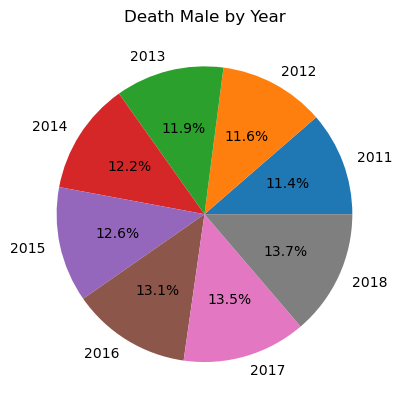

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

death_male = pd.read_excel('Death Male.xlsx')

dm_by_year = death_male.groupby('Year').sum()

plt.pie(dm_by_year['Number of death'], labels=dm_by_year.index, autopct='%1.1f%%')
plt.title('Death Male by Year')
plt.show()

(ii) Read the `Death Female.xlsx` and store it in a DataFrame named `death_female`. Group the data by `State` and name the result as `df_by_state` and plot an appropriate chart.

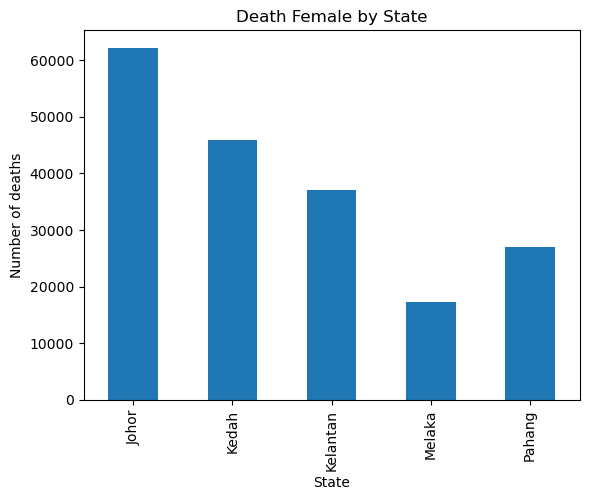

In [11]:
death_female = pd.read_excel('Death Female.xlsx')

df_by_state = death_female.groupby('State').sum()

df_by_state.plot(kind='bar', y='Number of death', legend=False)
plt.title('Death Female by State')
plt.xlabel('State')
plt.ylabel('Number of deaths')
plt.show()

**Task 2**

(i)	  Concatenate both `death_male` and `death_female` DataFrame and name the new DataFrame as `death`.	<br>
(ii)  Group the `death` by `State` and name the result as `by_state`.	<br>
(iii) Group the `death` by `Year` name the result as `by_year`.	<br>
(iv)  Create a chart as shown below with figure size of 12 inches × 6 inches and save it as Death in 2011-2018.png with dpi value 200.


<br>
<img src="Fig1.png", style="width: 750px";>

In [12]:
death = pd.concat([death_male, death_female])

by_state = death.groupby('State').sum()

by_year = death.groupby('Year').sum()

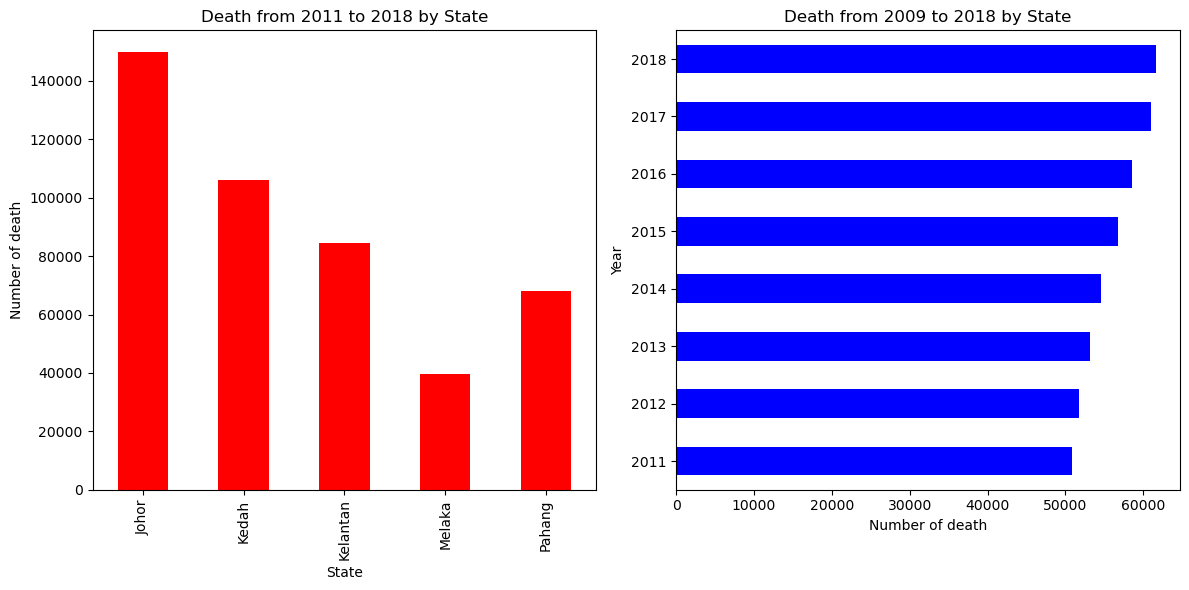

In [13]:
plt.figure(figsize=(12, 6))

# Bar chart for by_year with red bars
plt.subplot(1, 2, 1)
by_state['Number of death'].plot(kind='bar', color='red')
plt.title('Death from 2011 to 2018 by State')
plt.xlabel('State')
plt.ylabel('Number of death')

# Column chart for by_state with blue columns
plt.subplot(1, 2, 2)

by_year['Number of death'].plot(kind='barh', color='blue')
plt.title('Death from 2009 to 2018 by State')
plt.xlabel('Number of death')
plt.ylabel('Year')

plt.tight_layout()
plt.savefig('Death in 2011-2018.png', dpi=200)

plt.show()

**Task 3**

(i)	Create a pivot table with the name `death_pivot` as shown below.

<br>
<img src="Fig2a.png", style="width: 300px";>

In [14]:
death_pivot = death.pivot_table(index=['Gender', 'Year'], columns='State', values='Number of death')

death_pivot

State          Johor   Kedah  Kelantan  Melaka  Pahang
Gender Year                                           
Female 2011   6875.0  5025.0    4400.0  1964.0  3080.0
       2012   7212.0  5209.0    4301.0  1987.0  3078.0
       2013   7335.0  5420.0    4407.0  2078.0  3184.0
       2014   7387.0  5613.0    4630.0  2009.0  3209.0
       2015   7808.0  5941.0    4702.0  2181.0  3427.0
       2016   8250.0  6037.0    4698.0  2271.0  3531.0
       2017   8586.0  6283.0    4919.0  2431.0  3763.0
       2018   8733.0  6336.0    4984.0  2328.0  3721.0
Male   2011   9604.0  6844.0    5624.0  2642.0  4732.0
       2012   9989.0  7059.0    5589.0  2588.0  4713.0
       2013  10361.0  7096.0    5635.0  2669.0  4962.0
       2014  10517.0  7404.0    5958.0  2719.0  5092.0
       2015  11045.0  7733.0    6087.0  2778.0  5044.0
       2016  11674.0  7734.0    6111.0  2915.0  5347.0
       2017  12076.0  8049.0    6284.0  3092.0  5498.0
       2018  12384.0  8216.0    6332.0  3079.0  5525.0

(ii) Create a plot as shown below.

<br>
<img src="Fig3.png", style="width: 800px";>

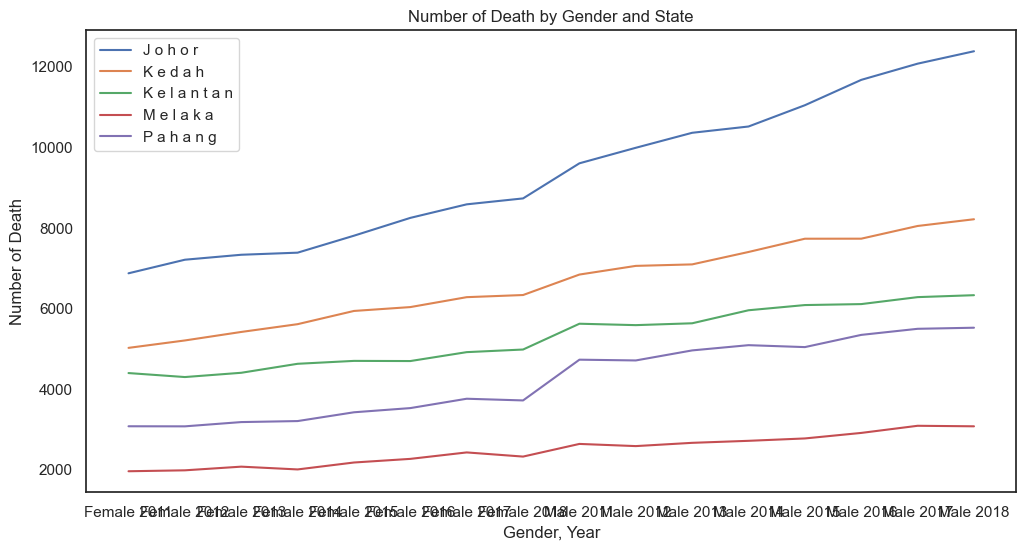

In [40]:
import seaborn as sns

sns.set(style="white")

death_pivot.index = [' '.join(str(i) for i in idx) for idx in death_pivot.index.values]

# Convert tuple column names to strings
death_pivot.columns = [' '.join(str(col)).strip() for col in death_pivot.columns.values]

# Plot data
plt.figure(figsize=(12,6))
for column in death_pivot.columns:
    plt.plot(death_pivot.index, death_pivot[column], label=column)

# Set the title and labels
plt.title('Number of Death by Gender and State')
plt.xlabel('Gender, Year')
plt.ylabel('Number of Death')

# Show the legend
plt.legend()

# Show the plot
plt.show()

### Question 4

(a)	The file named `Expenditure.xlsx` describes the expenditure (in dollars) on recreation per month by employees at a certain company, and their corresponding monthly incomes. 

    (i)	Using simple linear regression method, find the equation of the regression line. 
    (ii)	Find the slope and interception values for the regression line. 
    (iii)   Plot the data with the regression line.
    (iv)	Then estimate the monthly income of an employee at this company who spends 5000 dollars per month on recreation.  	


Slope: 9.774034574448894
Intercept: 19370.109089952737


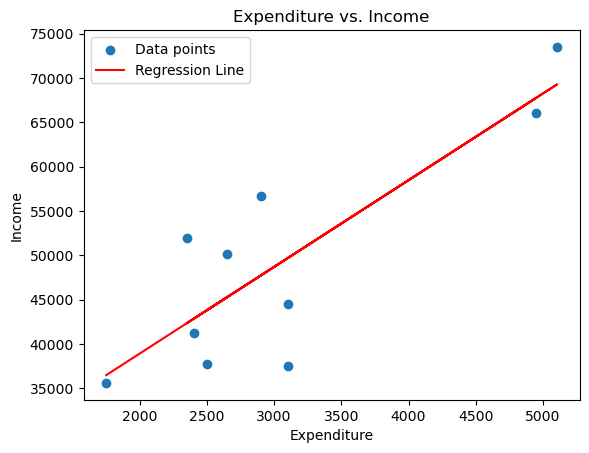

Estimated monthly income for an expenditure of 5000 dollars: 68240.2819621972


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

df = pd.read_excel('Expenditure.xlsx')

# (i) Using simple linear regression method, find the equation of the regression line.
slope, intercept, r_value, p_value, std_err = linregress(df['Expenditure'], df['Income'])

# (ii) Find the slope and interception values for the regression line.
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# (iii) Plot the data with the regression line.
plt.scatter(df['Expenditure'], df['Income'], label='Data points')
plt.plot(df['Expenditure'], slope * df['Expenditure'] + intercept, color='red', label='Regression Line')
plt.title('Expenditure vs. Income')
plt.xlabel('Expenditure')
plt.ylabel('Income')
plt.legend()
plt.show()

# (iv) Estimate the monthly income for an expenditure of 5000 dollars.
estimated_income = slope * 5000 + intercept
print(f"Estimated monthly income for an expenditure of 5000 dollars: {estimated_income}")

(b) Clustering Task:

(i)	Load the `Titanic.csv` into a DataFrame named `Titanic`. Below is the data dictionary for the dataset.

<br>
<img src="Fig4.png", style="width: 500px";>

(ii) Perform dimensionality reduction to the dataset using the Principal Component Analysis (PCA) and next apply k-means clustering to the data.

In [48]:
Titanic = pd.read_csv('Titanic.csv')
Titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,1,0,80.0,0,0,30.0000,1,0
1,0,1,0,31.0,0,0,50.4958,1,0
2,1,1,0,4.0,0,2,81.8583,1,0
3,0,1,0,39.0,0,0,0.0000,1,0
4,1,1,0,28.0,0,0,35.5000,1,0
...,...,...,...,...,...,...,...,...,...
709,0,3,0,7.0,4,1,29.1250,-1,2
710,0,3,0,8.0,4,1,29.1250,-1,2
711,0,3,1,39.0,0,5,29.1250,-1,2
712,1,1,1,38.0,0,0,80.0000,1,2


In [49]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# First, we are standardizing the data. PCA is affected by scale so we need to scale the features in the data before applying PCA.
scaler = StandardScaler()
Titanic_scaled = scaler.fit_transform(Titanic)

# Applying PCA
pca = PCA(n_components=2) 
Titanic_pca = pca.fit_transform(Titanic_scaled)

# Applying k-means clustering
kmeans = KMeans(n_clusters=3) 
kmeans.fit(Titanic_pca)

# cluster labels
labels = kmeans.labels_


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
